These are study notes from the book [Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do), by Andreas C. Müller and Sarah Guido. As Python is currently a new language to me, I found useful to write down the code and some discussions presented on the book. The material below, except some notes done by myself, is taken from the chapter two, "Supervised Learning".

In [466]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import IPython
import IPython.display
import pandas as pd
import wand.image

X.shape: (26, 2)


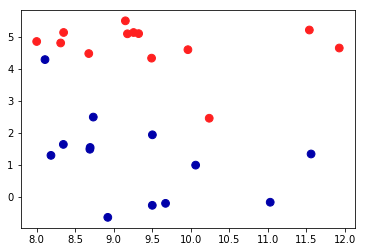

In [467]:
# Generate dataset

X, y = mglearn.datasets.make_forge()
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
print("X.shape: %s" % (X.shape,))
plt.show()

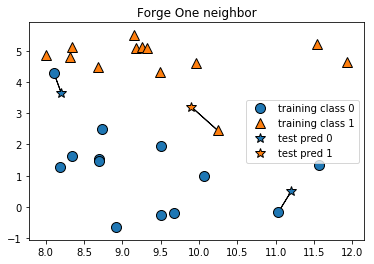

In [468]:
# One nearest neighbor

mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title("Forge One neighbor")
plt.show()

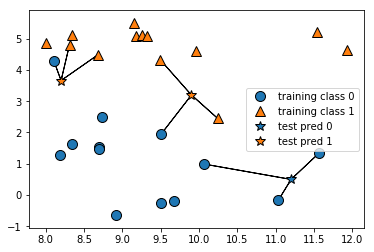

In [469]:
# Three nearest neighbors
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

In [470]:
## Applying the k nearest neighbors algorithm using scikit-learn

# First we split the dataset we generated before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Now import and instantiate the class. This is when we set parameters.
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Now we fit the classifies using the training set. For KNeighborsClassifier this
# means storing the data set, so we can compute neighbors during predictions.
clf.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [471]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [472]:
print(X_test)
print(y_test)

[[ 11.54155807   5.21116083]
 [ 10.06393839   0.99078055]
 [  9.49123469   4.33224792]
 [  8.18378052   1.29564214]
 [  8.30988863   4.80623966]
 [ 10.24028948   2.45544401]
 [  8.34468785   1.63824349]]
[1 0 1 0 1 1 0]


In [473]:
# Evaluating how well the model generalizes: score method with the test 
# data together with the test labels.
clf.score(X_test, y_test)

0.8571428571428571

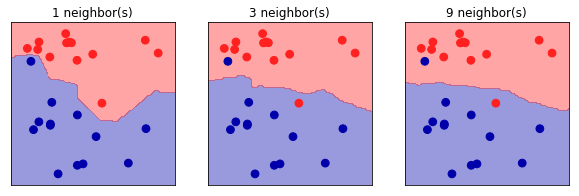

In [474]:
# Analyzing KNeighborsClassifier. Visualization of the decision boundary for
# one, three and five neighbors.
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%d neighbor(s)" % n_neighbors)
    
    
plt.show()

In [475]:
# Using single neighbor results in a decision boundary that follows the training data set closely (complex model),
# and more neighbors leads to a smoother decision boundary (simple model).

# Let's investigate this feature  with the real world breast cancer data set.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [476]:
cancer['data']

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [477]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [478]:
cancer['target_names']

array(['malignant', 'benign'], 
      dtype='<U9')

In [479]:
print(np.bincount(cancer.target))
print(cancer['target_names'])

[212 357]
['malignant' 'benign']


In [480]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [481]:
cancer.data.shape

(569, 30)

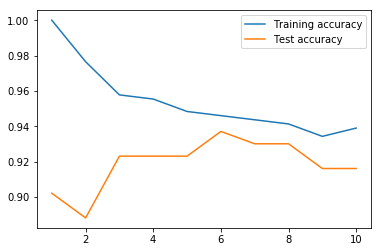

In [482]:
# Training-test split.
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Plotting accuracy versus neighbors.
training_accuracy = []
test_accuracy = []
# Try n_neighbors from 1 to 10.
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # Build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Record training set accuracy. Append a single item to the end of the bytearray.
    training_accuracy.append(clf.score(X_train, y_train))
    # Record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
    
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.legend()
plt.show()

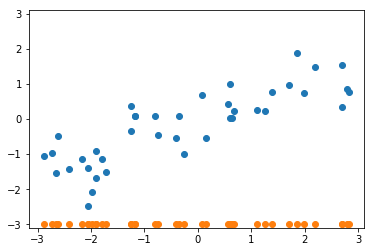

In [483]:
## k-NEIGHBORS REGRESSION
# Wave data set. 
X, y = mglearn.datasets.make_wave(n_samples=40)
# The wave data set only has a single input feature, and a continuous target variable.
plt.plot(X,y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-3.1, 3.1)
plt.show()

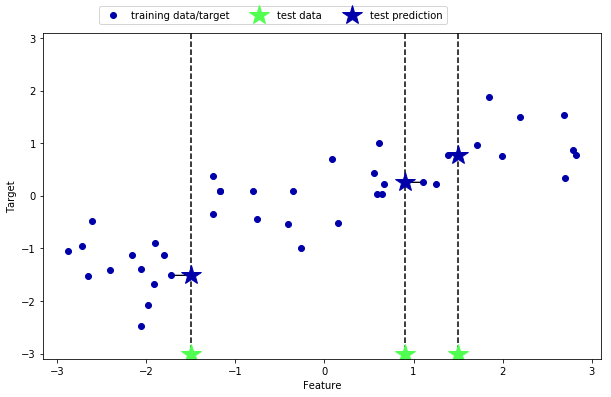

In [484]:
# One nearest neighbor.
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

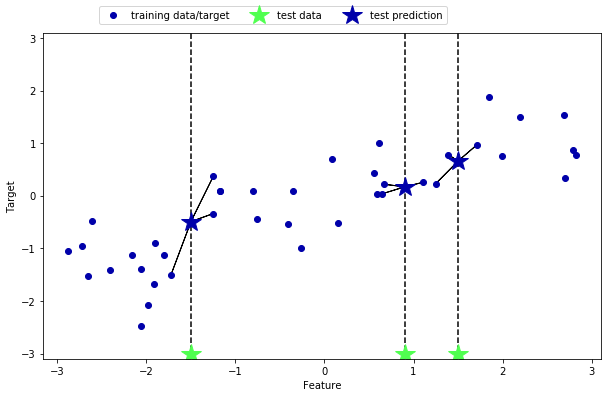

In [485]:
# When using multiple nearest neighbors for regression, the prediction is the average of the
# relevant neighbors.
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

In [486]:
# The k nearest neighbors algorithm for regression is implemented in the KNeighbors
# Regressor class in scikit-learn.

from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# Split the wave data set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model.
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [487]:
# Now we can make prediction on the test set.
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [488]:
# Score method for evaluation.
reg.score(X_test, y_test)
# For regressors he score method returns the R² score. The R² score, aldso known
# as the coefficient of determination, is a measure of goodness of a prediction for
# a regression model and yields a score from 0 up to 1. A value of 1 corresponds to
# a perfect prediction while 0 corresponds to a constant model that just predicts
# the mear of the training set responses y_train.

0.83441724462496036

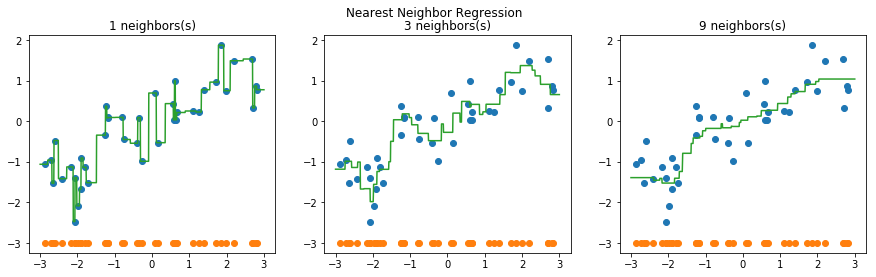

In [489]:
# Analyzing k nearest neighbors regression

fig, axes = plt.subplots(1, 3, figsize=(15,4))
# Create 1000 data point, evenly spaced between -3 and 3.
line = np.linspace(-3, 3, 1000).reshape(-1,1)
# Make sure to check out linspace and reshape documentation from the numpy library.
# linspace: "Return evenly spaced numbers over a specified interval"
# reshape: "Gives a new shape to an array without changing its data"
plt.suptitle("Nearest Neighbor Regression")

for n_neighbors, ax in zip([1, 3, 9], axes):
        # Make predictions using 1, 3 and 9 neighbors.
        reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X,y)
        # The original data
        ax.plot(X, y, 'o')
        ax.plot(X, -3 * np.ones(len(X)), 'o')
        # The predictions
        ax.plot(line, reg.predict(line))
        ax.set_title("%d neighbors(s)" % n_neighbors)
        
plt.show()

# Using only a single neighbor, each int in the training set has an obvious influence on the
# predictions and the predicted values go through all data points, which leads to a very
# unsteady prediction. Considering more neighbors leads to smoother predictions.

In [490]:
from IPython.external import mathjax
from IPython.display import display, Math, Latex
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

w[0]: 0.393906  b: -0.031804


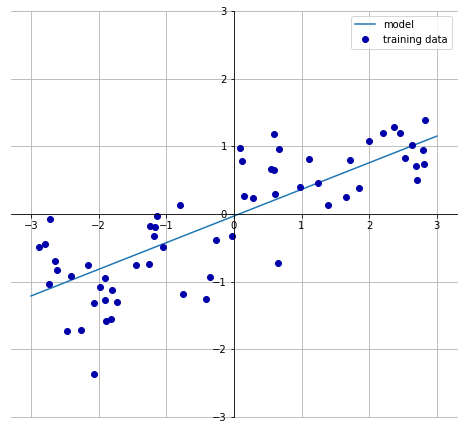

In [491]:
## LINEAR MODELS FOR REGRESSION

# For a data set with a single feature as wage: y = w[0]*x[0] + b
mglearn.plots.plot_linear_regression_wave()
plt.show()
# Linear models for regression can be characterized as regression models for which the prediction is 
# a line for a single feature, a plane for two features, or a hyperplane in higher dimensions.

In [492]:
# LINEAR REGRESSION aka ORDINARY LEAST SQUARES

# Linear regression finds the parameters w and b that minimize the mean squared error 
# between predictions and the true regression target on the training set.

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [493]:
# The slope coefficients are stored in the coef_ attribute and the intercep in the intercept_
print("LR Coefficient: %s" % lr.coef_)
print("LR Intercept: %s" % lr.intercept_)

LR Coefficient: [ 0.39390555]
LR Intercept: -0.0318043430268


In [494]:
# Testing performance.
print("Training set score: %f" % lr.score(X_train, y_train))
print("Test set score: %f" % lr.score(X_test, y_test))
# The score on training and test set are very close: we are likely underfitting.

Training set score: 0.670089
Test set score: 0.659337


In [495]:
# Boston Housing data set. A more complex case: 506 samples and 105 features.
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

# Comparing the training set and test set score, we see a clear sign of overfitting.
print("Training set score: %f" % lr.score(X_train, y_train))
print("Test set score: %f" % lr.score(X_test, y_test))

# We should try to find a model that allows us to control complexity.

Training set score: 0.952353
Test set score: 0.605775


In [496]:
# RIDGE REGRESSION
# The coefficients w are chosen not only so thath they predict well on the training data, 
# but there is an additional constraint: their magnitude must be as small as possible.
# This constrain is an example of what is called regularization. 
# Regularization means explicitly restricting a model to avoid overfitting.
# Ridge Regression: L2 regularization.

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: %f" % ridge.score(X_train, y_train))
print("Test set score: %f" % ridge.score(X_test, y_test))

# With linear regression, we were overfitting to our data. Ridge is a more restricted
# model, so we are less likely to overfit. A less complex model means worse performance
# on the training set, but better generalization.

Training set score: 0.886058
Test set score: 0.752714


In [497]:
# The Ridge model makes a trade-off between the simplicity of the model and its performance
# on the training set.: alpha parameter. Default = 1. 
# Increasing alpha forces coefficients to move more towards to zero, which might help generalization.
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: %f" % ridge10.score(X_train, y_train))
print("Test set score: %f" % ridge10.score(X_test, y_test))

Training set score: 0.788346
Test set score: 0.635897


In [498]:
# Decreasing alpha allows the coefficients to be less restricted. For very small value of
# alpha, coefficients are barely restrict at all, and we end up with a model that 
# resembles LinearRegression.
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: %f" % ridge01.score(X_train, y_train))
print("Test set score: %f" % ridge01.score(X_test, y_test))
# Here alpha equals to 0.7 seems to be working well, we could try decreasing even more
# to improve generalization.

Training set score: 0.928578
Test set score: 0.771793


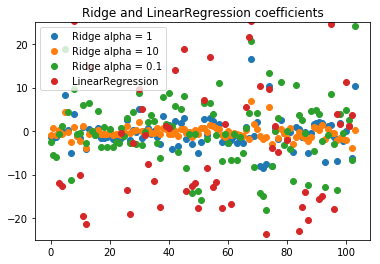

In [499]:
plt.title("Ridge and LinearRegression coefficients")
plt.plot(ridge.coef_, 'o', label="Ridge alpha = 1")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha = 10")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.ylim(-25, 25)
plt.legend()
plt.show()
# The x-axis enumerates the entries of coef_: x=0 shows the coefficient associated
# with the first feature, x=1 shows the one associated with the second feature  and so on.

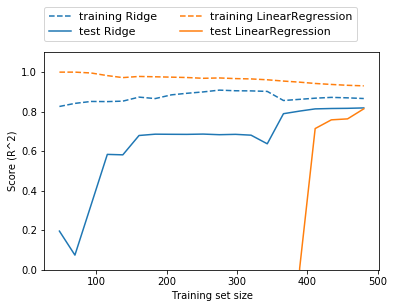

In [500]:
# Another way to understand the influence of regularization is to fix a value of alpha,
# but vary the amount of training data available.
mglearn.plots.plot_ridge_n_samples()
# The Boston Housing data set were sub sampled and LinearRegression and Ridge(alpha=1) were
# evaluated on subsets on increasing size.
# Note the Linear Regression's accuracy is acceptable only for a training set with 75% or more
# samples from the total data.
# ---> With enough training data, regularization becomes less important and given enough data,
# ridge and linear regression will have the same performance.
# ---> The decrease in training performance for linear regression: if more data is added, it
# becomes harder for a model to overfit, or memorize the data.
plt.show()
# Plots that show model performance as a function of the data set site are called LEARNING CURVES.

In [501]:
# LASSO
# An alternative to Ridge for regularizing linear regression. It also restricts coefficients
# to be close to zero, but in a slightly different way, called L1 regularization.

# In the L1 regularization, some coefficients are exactly zero. Some features are entirely
# ignored by the model. This can be seen as a form of automatic feature selection.
# If some coefficients are zero, the model can easier to interpret and can reveal its most
# important features.

from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

print("Training set score: %f" % lasso.score(X_train, y_train))
print("Test set score: %f" % lasso.score(X_test, y_test))
print("Number of features used: %d" % np.sum(lasso.coef_ != 0))

# Lasso does quite badly, both on the training and the test set --> we are underfitting.
# Only four of the 105 features were used.

Training set score: 0.293238
Test set score: 0.209375
Number of features used: 4


In [502]:
# Similarly to Ridge, Lasso also has a regularization parameter that controls how strongly
# coefficients are pushed towards zero. Default = 1.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
# We increased the fefault setting of "max_iter" in order to converge the model. We would be
# warned if we wouldn't do that.

print("Training set score: %f" % lasso001.score(X_train, y_train))
print("Test set score: %f" % lasso001.score(X_test, y_test))
print("Number of features used: %d" % np.sum(lasso001.coef_ != 0))

# The performance is slightly better than Ridge and we udes only 33 of the 105 features.

Training set score: 0.896507
Test set score: 0.765649
Number of features used: 33


In [503]:
# On the other hand, if we set alpha too low, the regularization effect is removed and we end
# up with overfitting, similar to LinearRegression.

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: %f" % lasso00001.score(X_train, y_train))
print("Test set score: %f" % lasso00001.score(X_test, y_test))
print("Number of features used: %d" % np.sum(lasso00001.coef_ != 0))

Training set score: 0.951061
Test set score: 0.640310
Number of features used: 94


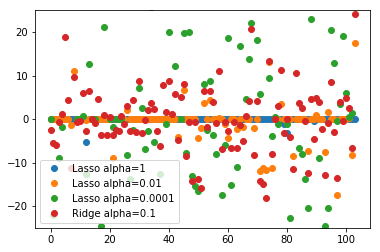

In [504]:
# Plotting the coefficients of the different models.
plt.plot(lasso.coef_, 'o', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 'o', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'o', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25)
plt.legend()
plt.show()

# Note the best Ridge solution has similar predicted performance to the Lasso model with
# alpha equals to 0.01, but with Ridge all the coefficients are non-zero, which leads to
# a quite unregularized model, more difficult to understand.

# In practice, Ridge regression is usually the first choice between them. However, if we
# have a large amount of features and expect only a few to be important, Lasso may be a
# better choice. Similarly, if you would like to have a model easier to interpret, Lasso
# could be a better choice, since it will select only a subset of the input features.

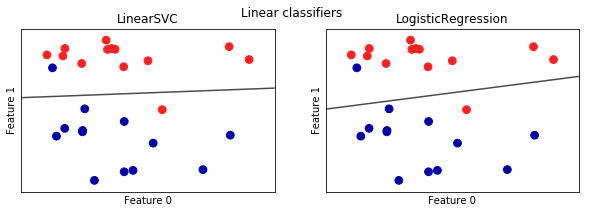

In [505]:
# LINEAR MODELS FOR CLASSIFICATION

# Logistic regression and Linear Support Vector Machines are the two most common
# linear classification algorithms.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))
plt.suptitle("Linear classifiers")

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm2)
    ax.set_title("%s" % clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
   
       
plt.show()

# x axis: first feature of the forge data set.
# y axis: second feature of the forge data set.
# line: decision boundary
# By default, both models apply an L2 regularization, in the same way Ridge
# does for regression. Note the two models come up to similar decision boundaries.

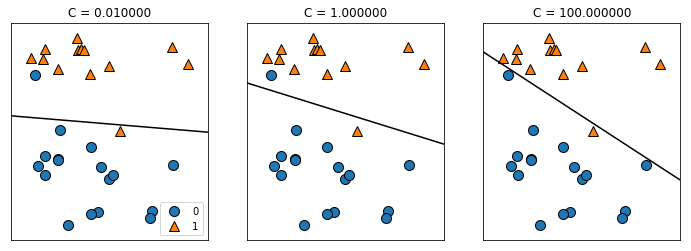

In [506]:
# For LogisticRegression and LinearSVC the trade-off parameter for the
# regularization strength is called C. Higher values of C correspond to 
# less regularization. That means with higher values of C, the implementations
# try to fit the training set as best as possible, while with low values the
# model put more emphasis on finding a coefficient vector close to 0.

mglearn.plots.plot_linear_svc_regularization()
plt.show()

# With low values of C the algorithms try to adjust to the "majority" of data
# points, while higher values stress the importance that each individual data
# point be classified correctly.

In [507]:
# Now let's analyze a data set with more features.

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)
logisticregression = LogisticRegression().fit(X_train, y_train)
print("Training set score: %f" % logisticregression.score(X_train, y_train))
print("Test set score: %f" % logisticregression.score(X_test, y_test))

# The default value C=1 provides quite good performance. As training and test
# performance are vey close, it is likely we are underfitting.

Training set score: 0.953052
Test set score: 0.958042


In [508]:
# We can try to increase C to fit a more flexible model.

logisticregression100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: %f" % logisticregression100.score(X_train, y_train))
print("Test set score: %f" % logisticregression100.score(X_test, y_test))

Training set score: 0.967136
Test set score: 0.965035


In [509]:
# Using a more regularized model than default C=1.
logisticregression001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: %f" % logisticregression001.score(X_train, y_train))
print("Test set score: %f" % logisticregression001.score(X_test, y_test))

Training set score: 0.934272
Test set score: 0.930070


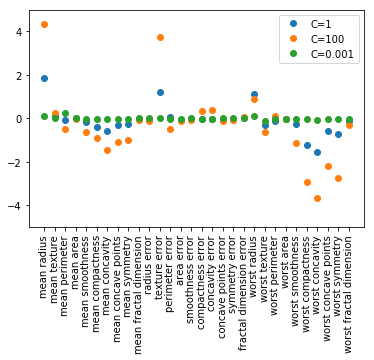

In [510]:
# We can take a look at the coefficients learned by the models with the three different
# settings of the regularization parameter.

plt.plot(logisticregression.coef_.T, 'o', label="C=1")
plt.plot(logisticregression100.coef_.T, 'o', label="C=100")
plt.plot(logisticregression001.coef_.T, 'o', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(-5, 5)
plt.legend()

plt.show()

# As LogisticRegression applies a L2 regularization by default, the result
# looks similar to Ridge. Strong regularization pushes coefficients more and
# more towards 0, though coefficients never become exactly 0.

# The interpretations of coefficients of linear models should always be skeptical. As 
# a example take a look to the coefficient related to the feature "Mean Perimeter". Note 
# its sign depends on the choice of the regularization parameter. One might think the 
# feature "Mean Perimeter" is associated with "benign", while someone else could associate
# it with "malignant".

L1 LogisticRegression. Training accuracy with C=0.001000: 0.913146
L1 LogisticRegression. Test accuracy with C=0.001000: 0.923077


L1 LogisticRegression. Training accuracy with C=1.000000: 0.960094
L1 LogisticRegression. Test accuracy with C=1.000000: 0.958042
L1 LogisticRegression. Training accuracy with C=100.000000: 0.985915
L1 LogisticRegression. Test accuracy with C=100.000000: 0.979021


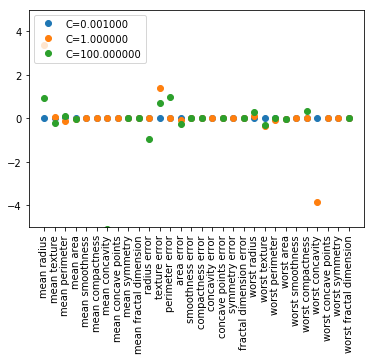

In [511]:
# A more interpretable model can be done with L1 regularization, as it limits the model
# to only a few features (some coefficients are set to zero).

for C in [0.001, 1, 100]:
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("L1 LogisticRegression. Training accuracy with C=%f: %f"
          % (C, lr_l1.score(X_train, y_train)))
    print("L1 LogisticRegression. Test accuracy with C=%f: %f" 
          % (C, lr_l1.score(X_test, y_test)))
    
    plt.plot(lr_l1.coef_.T, 'o', label="C=%f" % C)
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.ylim(-5, 5)
plt.legend(loc=2)
plt.show()

In [512]:
# LINEAR MODELS FOR MULTICLASS CLASSIFICATION

# Many linear classification models are binary models and do not extend naturally to the multi-class
# case (with the exception of Logistic regression). A common technique to extend a binary classification
# algorithm to a multi-class classification algorithm is the one-vs-rest approach.

# One-vs-rest approach: a binary model is learned for each class, which tries to separate this class
# from all other classes, resulting in as many binary models as there are classes.

# To make a prediction, all binary classifiers are tun on a test point. The one which has the highest 
# score on its single class "wins" and this class label is returned as a prediction.

# Having one binary classifier per class results in having one vector of slops and a intercept for each
# class. The mathematics behind logistic regression are somewhat different from the one-vs-rest approach, 
# but they also result in one coefficient vector and intercept per class and the same method of prediction
# is applied.

# As a example, a two-dimensional data set will be used, where each class (three in this case) is given
# by data sampled from a Gaussian distribution.

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)

# We can check that our target array is not binary anymore. In this case there are three target values.
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 2, 0])

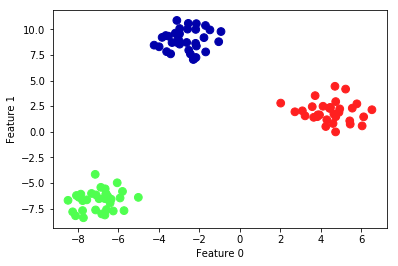

In [513]:
# The data is constructed in order to present three gaussian classes. The groups below are naturally 
# around its respective distribution mean.

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [514]:
# LinearSVS classifier on the data set.

linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


In [515]:
# The shape of coef_ is (3,2). Each row of coef_ contains the coefficient vector for one of the
# three classes. Each row has two entries, corresponding to the two features in the data set. The
# intercept_ is now a one dimensional array, storing the intercepts for each class.

print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.17492306  0.231402  ]
 [ 0.4762152  -0.06936542]
 [-0.18913871 -0.20400527]]
[-1.0774561   0.13140673 -0.0860493 ]


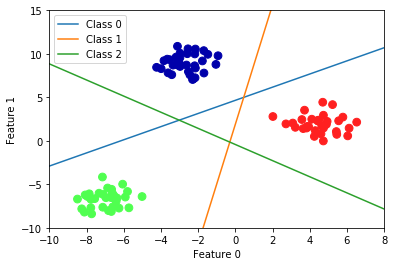

In [516]:
# Visualizing the lines by the three binary classifiers.

plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
line = np.linspace(-15, 15)

for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
    # Hint: z = ax + by + c with z=0.
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

# Note all the points belonging to Class 0 in the training data are above the line corresponding
# to class 0, which means they are on the class 0 side of the binary classifier. These points are
# the lines corresponding to Class 1 and Class 2, which means they are classified as "rest" by
# the binary classifier to class 1 and by the binary classifier to class 2. The other decision
# boundaries follow the same idea.

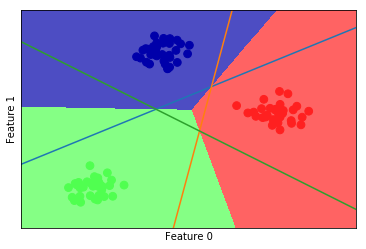

In [517]:
# What about the triangle in the middle of the plot? All three binary classifiers classify points there
# as "rest". Which class would a point there be assigned to? The one with the highest value for the
# classification formula: the class of the closest line.

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=mglearn.cm3)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [518]:
# STRENGTHS, WEAKNESSES AND PARAMETERS

# The regularization parameter is the main parameter of linear models, called alpha in the
# regression models and C in LinearSVC and LogisticRegression. Large alpha and small C mean
# simple models.

# In particular for the regression models, tuning this parameter is quite important. Usually C
# and alpha are searched for on a logarithmic scale.

# Other decision to make: L1 or L2 regularization. If it is assumed only a few features are
# actually important, L1 should be used. Otherwise, L2 should be used.

# Linear models are fast to train and also fast to predict. They scale to very large data sets
# and work well with sparse data. If there are hundreds of thousands or millions of samples, the
# libraries SGDClassifiers ans SGDRegressor might be investigated. They implement more scalable
# version of the linear models.

# Linear models make relatively easy to understand how a prediction is made, but it is often not
# entirely clear why coefficients are the way they are. This is particularly true if the data
# set has highly correlated features. In these cases the interpretation of the coefficients
# might be hard.

# They often perform well when the number of features is large compared to the number of
# samples. Linear models are also often used on very large data sets, simply because other
# models are not feasible to train. However, on smaller data set other models might yield better
# generalization performance.

In [519]:
# NAIVE BAYES CLASSIFIERS

# Naive Bayes classifiers are a family of classifiers quite similar to the linear models
# discussed.

# Naive Bayes classifiers: faster in training. The price for that: generalization performance
# slight worse than linear classifiers like LogisticRegression and LinearSVC.

# Why naive Bayes models are faster? The learn parameters by looking each feature individually
# and collect simple per-class statistics from each feature.

# Naive Bayes classifiers implemented in scikit-learn:
# GaussianNB: applied to any continuous data
# BernoulliNB: assumes binary data
# MultinomialNB: assumes count data

# Take a look at Naive Bayes Classifiers on the book for a more detailed discussion.

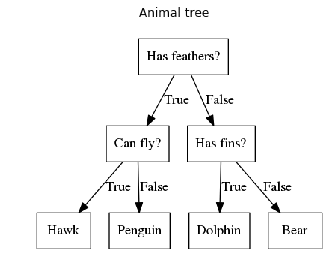

In [520]:
# DECISION TREES

# Widely used for classification and regression tasks. Essentially, the learn a hierarchy of
# if-else questions, leading to a decision.

# In this illustration each node in the tree either represents a question ou a terminal node (also
# called a leaf) which contains the answer.

mglearn.plots.plot_animal_tree()
plt.suptitle("Animal tree")
plt.show()

# Here we want to distinguish between four animals: bears, hawks, penguins and dolphins. In 
# machine learning parlance, we built a model distinguish between four classes of animals 
# using the three features "has feathers", "can fly" and "has fins".

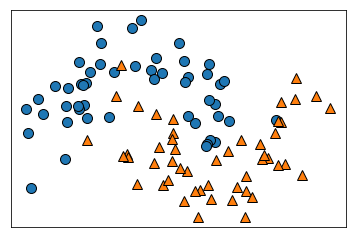

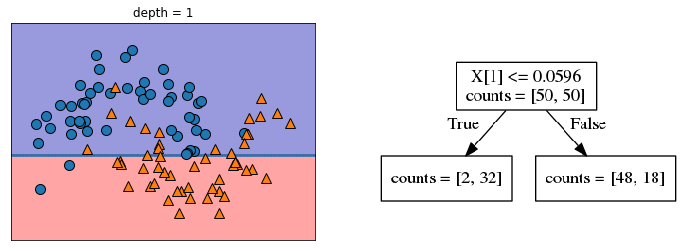

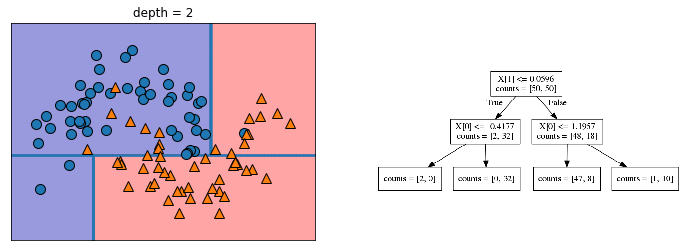

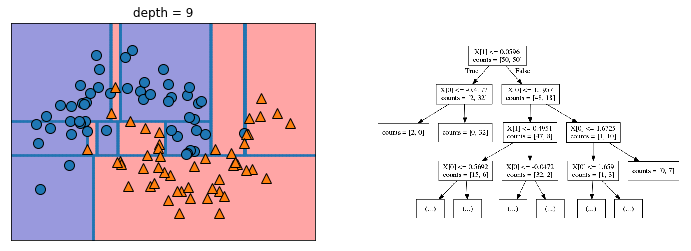

In [521]:
# BUILDING DECISION TREES

# The data set we are going to use consists of two half-moon shapes, with each class consisting 
# of 50 data points.

mglearn.plots.plot_tree_progressive()
plt.show()

# Usually data does not come in the form of binary yes/no features as in the animal example.

In [522]:
# Learning a decision tree means learning a sequence of if/else questions that gets us to the
# true answer most quickly. In Machine Learning these questions are called tests.

# The tests used on continuous data are of the form "is feature i larger than value a?". To build 
# a tree, the algorithm searches over all possible test and find the most informative one about
# the target variable.

# 1) Root: the top node representing the data set: 50 belonging to class 0 and 50 to class 1.
# 2) depth=1: the first split is done by testing whether x[1] <= 0.0596. If the test is true, a
# point is assigned to the left node, which contains 2 points belonging to class 0 and 32 points
# to class 1. Otherwise, a to the right node, which contains 48 points belonging to class 0 and 18 points
# to class 1.
# 3) depth=2: even though the first split did a good job, the bottom region contain points belonging to
# class 0 and top region still contains points belonging to class 1 --> a more accurate model is built 
# by repeating the process of looking for the best test in both regions (what do they mean about best 
# test?).

# The recursive procedure yields a binary tree of decision, with each node containing a test. Alternatively, 
# one can think of each test as splitting part of the data that is being currently being considered along 
# a axis. This yields a view of the algorithm as building a hierarchical partition.

# The recursive partitioning is repeated until each region in the partition (each leaf in the decision tree)
# only contains a single target value (a single class or a single regression value)

# If a leaf contains only data points with the same target values it is called pure.

# A prediction on a new data point is made by checking which region of the feature space partition the point
# lies in and then predicting the majority target in that region.

In [523]:
# CONTROLLING COMPLEXITY OF DECISION TRESS

# Typically, building a tree as described and continuing until all leaves are pure leads to very complex
# models and highly overfit the training data. Take a good look in the final plot and note red regions around
# blue points and vice-versa. The decision boundary focuses a lot on single outlier points far from other
# points in that class.

# Preventing overfitting:
# 1) Pre-pruning: stop the creation of the tree before it is ended.
# 2) Post-pruning or pruning: build the tree, but removing or collapsing nodes with little information. 

# Pre-pruning stop criteria: one could limit he maximum depth of the tree, limit the maximum number of leaves
# or requiring a minimum number of points in a node to keep splitting ir.

# Scikit-learn only implements pre-pruning.

# Example: breast cancer data set using the default setting of fully developing the tree (until it is pure).

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
# We fix random_state, which is used for tie-breaking internally. Take a look in the documentation.
tree.fit(X_train, y_train)

print("Accuracy on training set: %f" % tree.score(X_train, y_train))
print("Accuracy on test set: %f" % tree.score(X_test, y_test))

# Since all the leaves are pures, the accuracy on the training set is 100%, as expected. On the 
# training set is slightly worse than the linear models presented earlier.

Accuracy on training set: 1.000000
Accuracy on test set: 0.937063


In [524]:
# Pre-pruning. We set max_depth=4: only four consecutive questions can be asked.

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: %f" % tree.score(X_train, y_train))
print("Accuracy on test set: %f" % tree.score(X_test, y_test))

# Limiting the depth of the tree decreases overfitting.

Accuracy on training set: 0.988263
Accuracy on test set: 0.951049


In [525]:
# ANALYZING DECISION TREES

# export_graphviz: writes a file in the dot format, which is a text file format for
# for storing graphs.

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)

# We set a option to color the nodes to reflect the majority class in eah node and pass the 
# class and features names so the tree can be properly labeled.

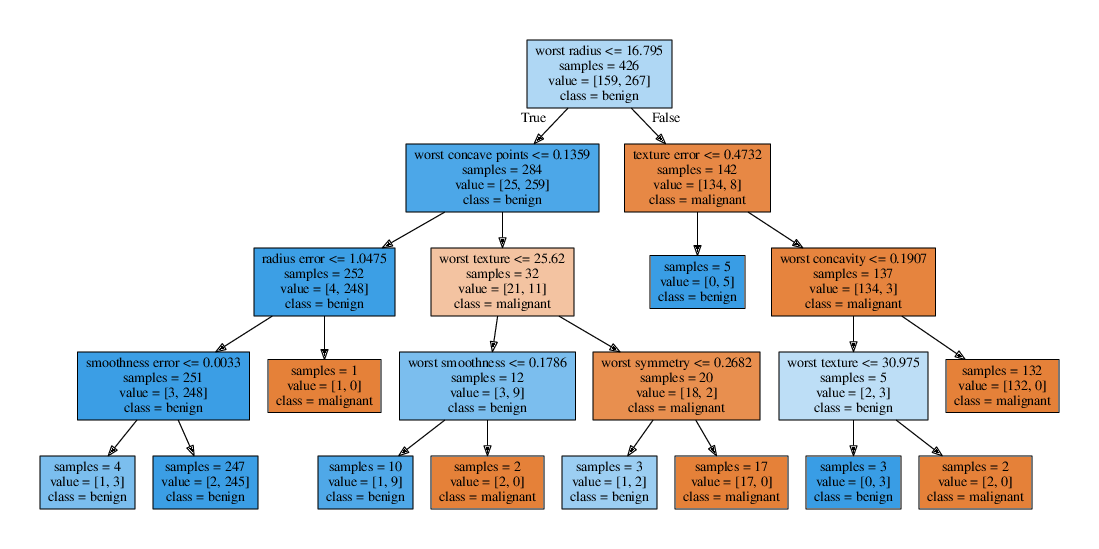

In [526]:
# The dot file can be read and visualized by the graphviz module.

import graphviz
import pydot
with open("tree.dot") as f:
    dot_graph = f.read()
    # Below we create a file called "Source.gv.pdf"
    graphviz.Source(dot_graph).view()
    
# To show the pdf file directly in the Jupyter Notebook, without transforming the file to PNG, we make
# use of the Wand library.

from wand.image import Image as WImage
WImage(filename='Source.gv.pdf')